(1314, 1562, 3)


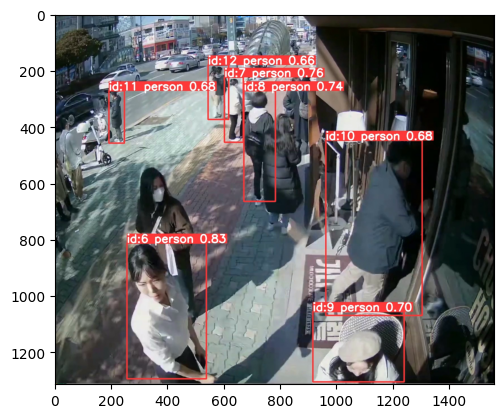

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("")
print(img.shape)
plt.imshow(img)

In [54]:
import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("cam1.jpg")
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  #마우스 이벤트 콜백 함수 구현 ---① 
    global  pts_cnt                     # 마우스로 찍은 좌표의 갯수 저장
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
        cv2.imshow(win_name, draw)
        print(x, y)

        pts[pts_cnt] = [x,y]            # 마우스 좌표 저장
        pts_cnt+=1
        if pts_cnt == 4:                       # 좌표가 4개 수집됨 
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 우하단 좌표
            topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])
            
            # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
            w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
            w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
            h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
            h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
            width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이
            
            # 변환 후 4개 좌표
            pts2 = np.float32([[0,0], [width-1,0], 
                                [width-1,height-1], [0,height-1]])
            
            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (int(width), int(height)))
            cv2.imshow('scanned', result)

cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④
cv2.waitKey(0)
cv2.destroyAllWindows()

631 178
45 575
922 203
825 1291
